<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/clustering_gen_vib_g11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.losses import mse
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [5]:
df1 = pd.read_excel('output_gen_brg_vib_9362_9367_9371_9372.xlsx')

In [6]:
df1.head(10)

AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
0          53.0          18.0          49.0          27.0          19.0   
1          55.0          18.0          52.0          28.6          20.3   
2          55.0          19.0          55.0          28.0          22.0   
3          64.0          17.0          46.0          25.0          28.0   
4          58.0          20.0          67.0          39.0          29.0   
5          57.0          20.0          68.0          38.0          29.0   
6          54.0          20.0          58.0          29.0          22.0   
7          54.0          20.0          57.0          28.0          21.0   
8          52.0          19.0          52.0          28.0          24.0   
9          58.0          20.0          58.0          29.0          27.0   

   AssetID_9367  AssetID_9371  AssetID_9372                date  
0          14.0          66.0          65.0 2021-03-16 05:38:30  
1          13.0          65.0          58.0 2021-03-17 09:02:17  
2          13.0          61.0          60.0 2021-03-18 06:12:19  
3           8.0          61.0          61.0 2021-03-19 08:34:49  
4          10.0          56.0          55.0 2021-03-20 17:46:50  
5          11.0          55.0          54.0 2021-03-20 19:51:22  
6          13.0          61.0          60.0 2021-03-20 23:00:21  
7          13.0          63.0          62.0 2021-03-21 02:10:51  
8          13.0          64.0          56.0 2021-03-21 04:51:18  
9          12.0          60.0          60.0 2021-03-21 07:42:14

In [7]:
df1.columns

Index(['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'date'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ≥ÿßÿ≤€å
data_to_scale = df1[['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372']]

# ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# ÿ™ÿ®ÿØ€åŸÑ ÿÆÿ±Ÿàÿ¨€å ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿ®ÿß ŸáŸÖÿßŸÜ ŸÜÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß
scaled_df = pd.DataFrame(scaled_data, columns=['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372'])

# ŸÜŸÖÿß€åÿ¥ €µ ÿ±ÿØ€åŸÅ ÿßŸàŸÑ
print(scaled_df.head())


   AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
0     -1.431691     -0.737316     -0.663103     -1.070140     -1.876557   
1     -1.260171     -0.737316     -0.399620     -0.928075     -1.786188   
2     -1.260171     -0.573890     -0.136137     -0.981349     -1.668015   
3     -0.488330     -0.900741     -0.926586     -1.247721     -1.250932   
4     -1.002891     -0.410465      0.917794     -0.004655     -1.181418   

   AssetID_9367  AssetID_9371  AssetID_9372  
0     -0.980522      0.998734      0.616436  
1     -1.009717      0.655069     -1.513953  
2     -1.009717     -0.719591     -0.905270  
3     -1.155691     -0.719591     -0.600929  
4     -1.097301     -2.437917     -2.426977  


In [9]:
scaled_df_clean = scaled_df.dropna()

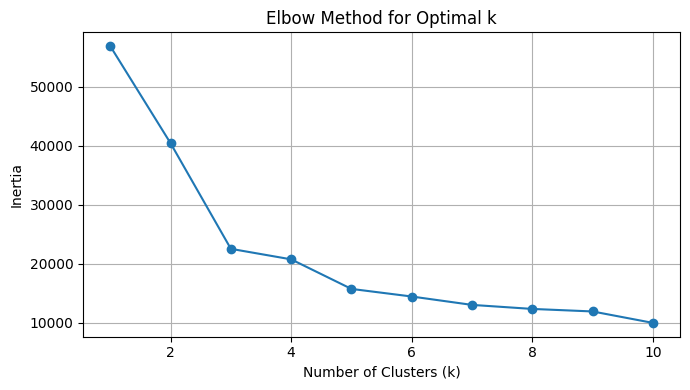

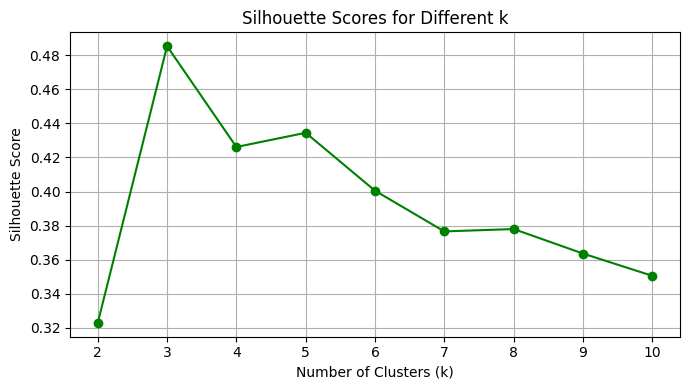

In [10]:
X = scaled_df_clean[['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


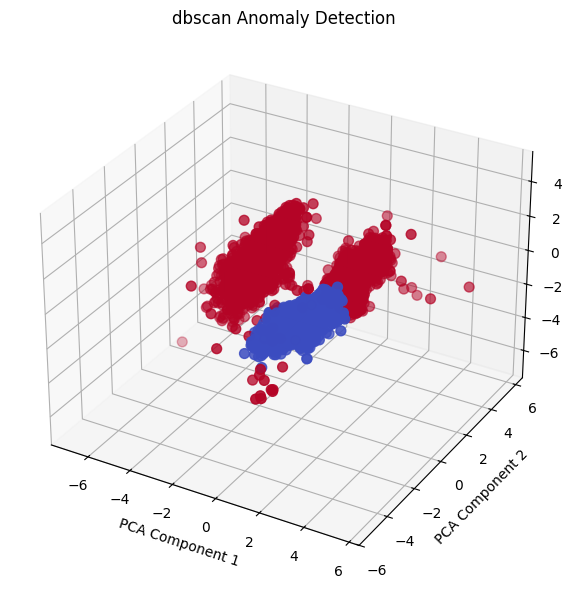

In [16]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.9, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('dbscan Anomaly Detection')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


In [12]:
import numpy as np

num_abnormal = np.sum(labels == -1)
num_total = len(labels)
print(f"ÿØÿ±ÿµÿØ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å‚ÄåŸáÿß: {100 * num_abnormal / num_total:.2f}%")


ÿØÿ±ÿµÿØ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å‚ÄåŸáÿß: 1.74%


In [13]:
import pandas as pd

# ÿ≥ÿßÿÆÿ™ €å⁄© ÿ≥ÿ±€å ÿßÿ≤ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ÿÆŸàÿ¥Ÿá
cluster_series = pd.Series(labels)

# ÿ¥ŸÖÿßÿ±ÿ¥ ÿ™ÿπÿØÿßÿØ ÿßÿπÿ∂ÿß€å Ÿáÿ± ÿÆŸàÿ¥Ÿá
cluster_counts = cluster_series.value_counts().sort_index()

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ÿÆŸàÿ¥Ÿá:")
for cluster_id, count in cluster_counts.items():
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise (abnormal)"
    print(f"{label}: {count} ŸÖŸàÿ±ÿØ")


ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ÿÆŸàÿ¥Ÿá:
Noise (abnormal): 124 ŸÖŸàÿ±ÿØ
Cluster 0: 2280 ŸÖŸàÿ±ÿØ
Cluster 1: 2379 ŸÖŸàÿ±ÿØ
Cluster 2: 2354 ŸÖŸàÿ±ÿØ


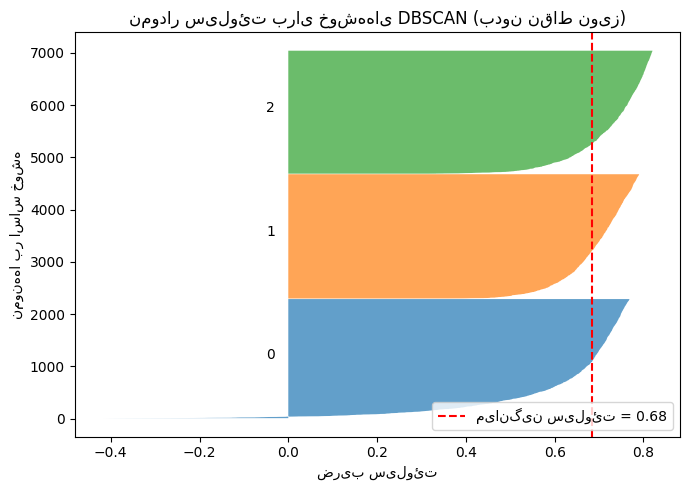

In [14]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.9, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿ®ÿß PCA ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥ Ÿà ÿ™ÿ≠ŸÑ€åŸÑ
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÜÿ±ŸÖÿßŸÑ (ÿ®ÿ±⁄Üÿ≥ÿ® ‚â† -1)
mask = labels != -1
pca_filtered = pca_result[mask]
labels_filtered = labels[mask]

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÜŸÖÿ±ÿßÿ™ ÿ≥€åŸÑŸàÿ¶ÿ™
silhouette_vals = silhouette_samples(pca_filtered, labels_filtered)
silhouette_avg = silhouette_score(pca_filtered, labels_filtered)

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ≥€åŸÑŸàÿ¶ÿ™
plt.figure(figsize=(7, 5))
y_lower = 10
for i in np.unique(labels_filtered):
    ith_cluster_silhouette_vals = silhouette_vals[labels_filtered == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥€åŸÑŸàÿ¶ÿ™ = {silhouette_avg:.2f}")
plt.xlabel("ÿ∂ÿ±€åÿ® ÿ≥€åŸÑŸàÿ¶ÿ™")
plt.ylabel("ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿÆŸàÿ¥Ÿá")
plt.title("ŸÜŸÖŸàÿØÿßÿ± ÿ≥€åŸÑŸàÿ¶ÿ™ ÿ®ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß€å DBSCAN (ÿ®ÿØŸàŸÜ ŸÜŸÇÿßÿ∑ ŸÜŸà€åÿ≤)")
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_score = -1
best_params = None

for eps in [0.3, 0.5, 0.7, 0.9]:
    for min_samples in [3, 4, 5, 6]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(scaled_df_clean)

        # ŸÅŸÇÿ∑ ŸÜŸÇÿßÿ∑ ŸÜÿ±ŸÖÿßŸÑ ÿ±ÿß ÿ®ÿ±ÿß€å ÿ≥€åŸÑŸàÿ¶ÿ™ ÿØÿ± ŸÜÿ∏ÿ± ÿ®⁄Ø€åÿ±
        mask = labels != -1
        if len(set(labels[mask])) > 1:
            score = silhouette_score(scaled_df_clean[mask], labels[mask])
            print(f"eps={eps}, min_samples={min_samples} ‚Üí silhouette={score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"\n‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: eps={best_params[0]}, min_samples={best_params[1]} ÿ®ÿß ŸÜŸÖÿ±Ÿá ÿ≥€åŸÑŸàÿ¶ÿ™ {best_score:.3f}")


eps=0.3, min_samples=3 ‚Üí silhouette=-0.124
eps=0.3, min_samples=4 ‚Üí silhouette=-0.101
eps=0.3, min_samples=5 ‚Üí silhouette=-0.030
eps=0.3, min_samples=6 ‚Üí silhouette=0.067
eps=0.5, min_samples=3 ‚Üí silhouette=-0.275
eps=0.5, min_samples=4 ‚Üí silhouette=-0.130
eps=0.5, min_samples=5 ‚Üí silhouette=0.023
eps=0.5, min_samples=6 ‚Üí silhouette=0.130
eps=0.7, min_samples=3 ‚Üí silhouette=0.058
eps=0.7, min_samples=4 ‚Üí silhouette=0.263
eps=0.7, min_samples=5 ‚Üí silhouette=0.282
eps=0.7, min_samples=6 ‚Üí silhouette=0.259
eps=0.9, min_samples=3 ‚Üí silhouette=0.418
eps=0.9, min_samples=4 ‚Üí silhouette=0.419
eps=0.9, min_samples=5 ‚Üí silhouette=0.420
eps=0.9, min_samples=6 ‚Üí silhouette=0.496

‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: eps=0.9, min_samples=6 ÿ®ÿß ŸÜŸÖÿ±Ÿá ÿ≥€åŸÑŸàÿ¶ÿ™ 0.496


In [20]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.9, min_samples=6) # Using the best params found earlier
labels = dbscan.fit_predict(scaled_df_clean)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
scaled_df_clean['dbscan_label'] = labels

# ÿßŸÅÿ≤ŸàÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® DBSCAN ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿß€åŸÜÿØ⁄©ÿ≥
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left')

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (ÿ®ÿ±⁄Üÿ≥ÿ® -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ŸÜŸÖŸàŸÜŸá ÿ™ÿµÿßÿØŸÅ€å ÿßÿ≤ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# ŸÜŸÖÿß€åÿ¥ ÿ¨ÿØŸàŸÑ ŸÜŸáÿß€å€å
print("üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):")
print(abnormal_sample)

üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):
   AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
0          58.0          20.0          68.0          35.0          44.0   
1          55.0          18.0          40.0          17.0          33.0   
2          66.0          19.0          61.0          25.0          40.0   
3          64.0          23.0          49.0          45.0          58.0   
4          45.0          15.0          38.0          40.0          72.0   
5          70.0          20.0          53.0          35.0          50.0   
6          48.0          17.0          38.0          35.0          63.0   
7          55.0          23.0          36.0          23.0          52.0   
8          26.0          66.0          58.0          58.0          54.0   
9          20.0          47.0          28.0          18.0          30.0   

   AssetID_9367  AssetID_9371  AssetID_93

In [25]:
from sklearn.cluster import DBSCAN
import pandas as pd

# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.9, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# ÿßŸÅÿ≤ŸàÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
scaled_df_clean['dbscan_label'] = labels

# ÿßŸÅÿ≤ŸàÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® DBSCAN ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿß€åŸÜÿØ⁄©ÿ≥
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left', suffixes=('', '_y'))

# ÿ≠ÿ∞ŸÅ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ÿØÿ± ÿµŸàÿ±ÿ™ Ÿàÿ¨ŸàÿØ
df1 = df1.loc[:, ~df1.columns.duplicated()]

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (ÿ®ÿ±⁄Üÿ≥ÿ® -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ŸÜŸÖŸàŸÜŸá ÿ™ÿµÿßÿØŸÅ€å ÿßÿ≤ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# ÿ≠ÿ∞ŸÅ ÿ≥ÿ™ŸàŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® DBSCAN
abnormal_sample = abnormal_sample.drop(columns=['dbscan_label'])

# ŸÜŸÖÿß€åÿ¥ ÿ¨ÿØŸàŸÑ ŸÜŸáÿß€å€å ÿ®Ÿá‚ÄåÿµŸàÿ±ÿ™ €å⁄©Ÿæÿßÿ±⁄ÜŸá
pd.set_option('display.max_columns', None)  # ŸÜŸÖÿß€åÿ¥ ÿ™ŸÖÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß
pd.set_option('display.width', None)        # ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿ¥⁄©ÿ≥ÿ™ŸÜ ÿÆÿ∑Ÿàÿ∑
print("üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):")
print(abnormal_sample)


üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):
   AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
0          58.0          20.0          68.0          35.0          44.0   
1          55.0          18.0          40.0          17.0          33.0   
2          66.0          19.0          61.0          25.0          40.0   
3          64.0          23.0          49.0          45.0          58.0   
4          45.0          15.0          38.0          40.0          72.0   
5          70.0          20.0          53.0          35.0          50.0   
6          48.0          17.0          38.0          35.0          63.0   
7          55.0          23.0          36.0          23.0          52.0   
8          26.0          66.0          58.0          58.0          54.0   
9          20.0          47.0          28.0          18.0          30.0   

   AssetID_9367  AssetID_9371  AssetID_93

In [26]:
# ÿ™ÿ®ÿØ€åŸÑ ÿ¨ÿØŸàŸÑ ÿ®Ÿá HTML
html_output = abnormal_sample.to_html(index=False, border=1, justify='center')

# ŸÜŸÖÿß€åÿ¥ HTML ÿØÿ± ÿÆÿ±Ÿàÿ¨€å
print("üîç ÿÆÿ±Ÿàÿ¨€å HTML ÿ¨ÿØŸàŸÑ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:")
print(html_output)


üîç ÿÆÿ±Ÿàÿ¨€å HTML ÿ¨ÿØŸàŸÑ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>AssetID_9362</th>
      <th>AssetID_9363</th>
      <th>AssetID_9364</th>
      <th>AssetID_9365</th>
      <th>AssetID_9366</th>
      <th>AssetID_9367</th>
      <th>AssetID_9371</th>
      <th>AssetID_9372</th>
      <th>date</th>
      <th>dbscan_label_x</th>
      <th>dbscan_label_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>58.0</td>
      <td>20.0</td>
      <td>68.0</td>
      <td>35.0</td>
      <td>44.0</td>
      <td>6.0</td>
      <td>68.0</td>
      <td>68.0</td>
      <td>2021-06-07 06:36:54</td>
      <td>-1.0</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <td>55.0</td>
      <td>18.0</td>
      <td>40.0</td>
      <td>17.0</td>
      <td>33.0</td>
      <td>20.0</td>
      <td>66.0</td>
      <td>58.0</td>
      <td>2021-12-15 19:32:18</td>
      <td>-1.0</td>
      <td>-1.0</td>
    </tr>
    <t

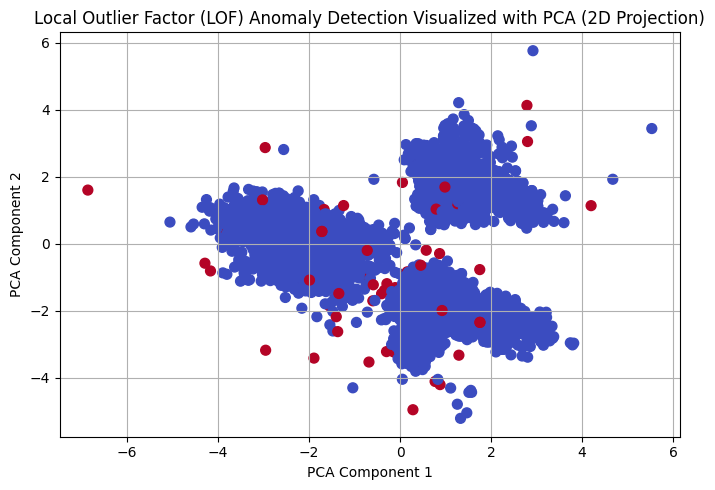

In [13]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿßÿ¨ÿ±ÿß€å LOF ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
labels = lof.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿØŸà ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)
plt.title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


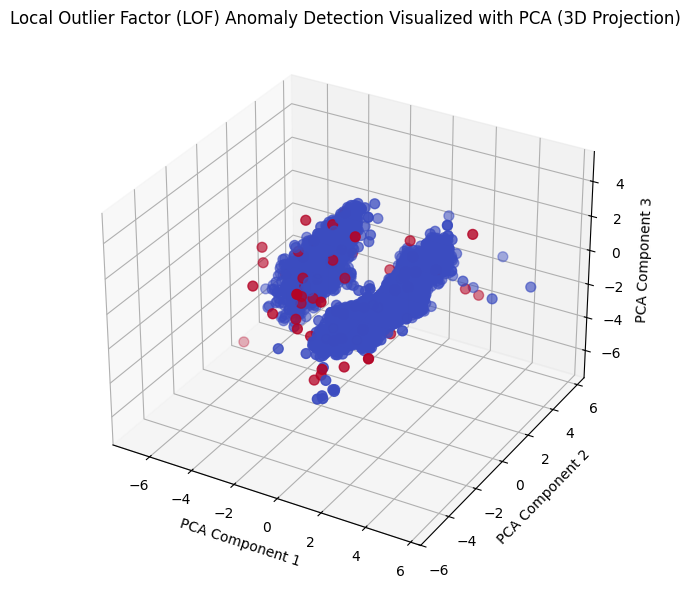

In [14]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ÿßÿ¨ÿ±ÿß€å LOF ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
labels = lof.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


In [15]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

best_ratio = -1
best_params = None

for contamination in [0.01, 0.03, 0.05, 0.1]:
    for n_neighbors in [10, 15, 20, 25]:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        labels = lof.fit_predict(scaled_df_clean)

        # ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØÿ±ÿµÿØ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å‚ÄåŸáÿß
        num_abnormal = np.sum(labels == -1)
        ratio = num_abnormal / len(labels)

        print(f"n_neighbors={n_neighbors}, contamination={contamination} ‚Üí abnormal ratio={ratio:.3f}")

        # ÿßŸÜÿ™ÿÆÿßÿ® ÿ™ÿ±⁄©€åÿ®€å ⁄©Ÿá ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å ŸÖŸÜÿ∑ŸÇ€å ÿ±ÿß ÿ¥ŸÜÿßÿ≥ÿß€å€å ⁄©ŸÜÿØ
        if ratio > best_ratio and ratio < 0.2:  # ŸÖÿ≠ÿØŸàÿØ ⁄©ÿ±ÿØŸÜ ÿ®Ÿá ÿØÿ±ÿµÿØŸáÿß€å ŸÖŸÜÿ∑ŸÇ€å
            best_ratio = ratio
            best_params = (n_neighbors, contamination)

print(f"\n‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: n_neighbors={best_params[0]}, contamination={best_params[1]} ÿ®ÿß ŸÜÿ≥ÿ®ÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å {best_ratio:.3f}")


n_neighbors=10, contamination=0.01 ‚Üí abnormal ratio=0.010
n_neighbors=15, contamination=0.01 ‚Üí abnormal ratio=0.010
n_neighbors=20, contamination=0.01 ‚Üí abnormal ratio=0.010
n_neighbors=25, contamination=0.01 ‚Üí abnormal ratio=0.010
n_neighbors=10, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=15, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=20, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=25, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=10, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=15, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=20, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=25, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=10, contamination=0.1 ‚Üí abnormal ratio=0.100
n_neighbors=15, contamination=0.1 ‚Üí abnormal ratio=0.100
n_neighbors=20, contamination=0.1 ‚Üí abnormal ratio=0.100
n_neighbors=25, contamination=0.1 ‚Üí abnormal ratio=0.100

‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: n_neighbors=10

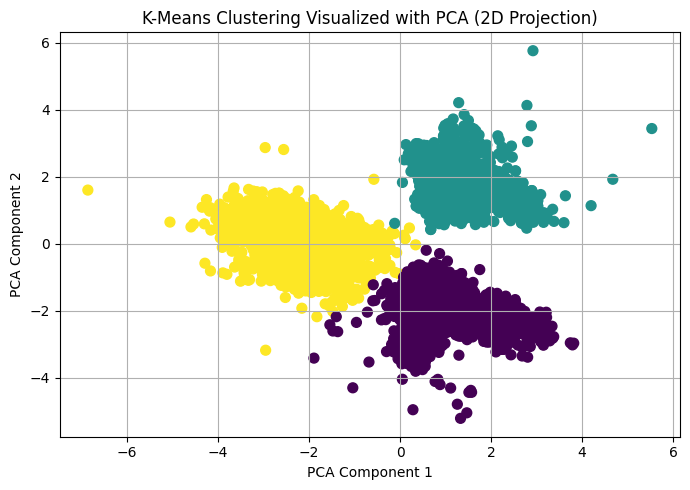

In [16]:
# ÿßÿ¨ÿ±ÿß€å K-Means ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿØŸà ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å K-Means
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title('K-Means Clustering Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


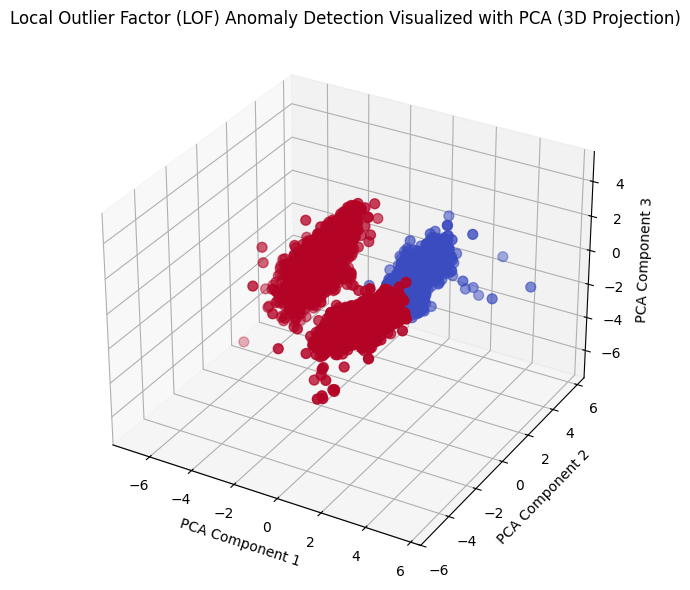

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿßÿ¨ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ™ÿ¨ŸÖÿπ€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')  # ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ŸÇÿßÿ®ŸÑ ÿ™ŸÜÿ∏€åŸÖ ÿßÿ≥ÿ™
cluster_labels = agglo.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



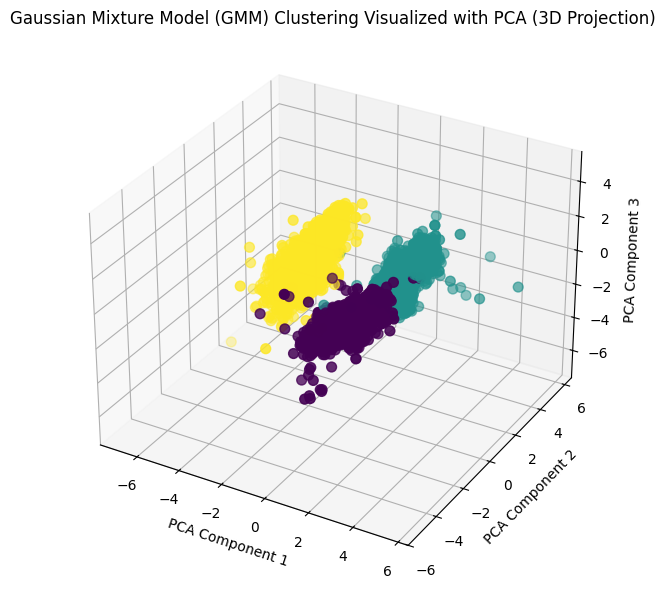

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿßÿ¨ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ®ÿß ŸÖÿØŸÑ ŸÖÿÆŸÑŸàÿ∑ ⁄ØÿßŸàÿ≥€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)  # ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ŸÇÿßÿ®ŸÑ ÿ™ŸÜÿ∏€åŸÖ ÿßÿ≥ÿ™
gmm_labels = gmm.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å GMM ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# ŸÖÿ≠ÿØŸàÿØŸá‚Äåÿß€å ÿßÿ≤ ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ¢ÿ≤ŸÖŸàŸÜ
cluster_range = range(2, 10)

# ÿ∞ÿÆ€åÿ±Ÿá ÿßŸÖÿ™€åÿßÿ≤Ÿáÿß ÿ®ÿ±ÿß€å ŸÖŸÇÿß€åÿ≥Ÿá
gmm_scores = []
agglo_scores = []

for k in cluster_range:
    # Gaussian Mixture
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_df_clean)
    gmm_score = silhouette_score(scaled_df_clean, gmm_labels)
    gmm_scores.append(gmm_score)

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo_labels = agglo.fit_predict(scaled_df_clean)
    agglo_score = silhouette_score(scaled_df_clean, agglo_labels)
    agglo_scores.append(agglo_score)

# ŸÜŸÖÿß€åÿ¥ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß
best_k_gmm = cluster_range[np.argmax(gmm_scores)]
best_k_agglo = cluster_range[np.argmax(agglo_scores)]

print(f"Best GMM n_components: {best_k_gmm} with silhouette score: {max(gmm_scores):.4f}")
print(f"Best Agglomerative n_clusters: {best_k_agglo} with silhouette score: {max(agglo_scores):.4f}")



Best GMM n_components: 3 with silhouette score: 0.4832
Best Agglomerative n_clusters: 3 with silhouette score: 0.4832


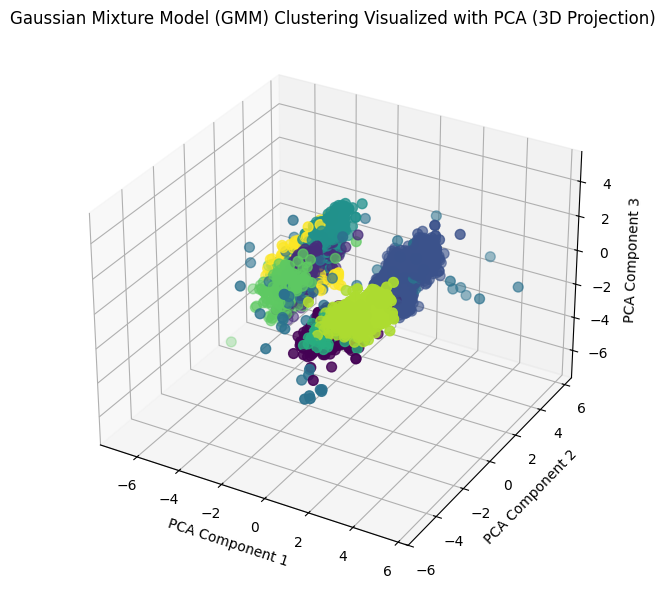

In [22]:
# ÿßÿ¨ÿ±ÿß€å Isolation Forest ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å GMM ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [24]:
# Re-run Isolation Forest to add 'anomaly_label' column
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

scaled_df_clean['anomaly_label'] = labels

# ÿ¥ŸÖÿßÿ±ÿ¥ ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ Ÿà ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
counts = scaled_df_clean['anomaly_label'].value_counts()

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ (label = 1):", counts.get(1, 0))
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (label = -1):", counts.get(-1, 0))

ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ (label = 1): 7065
ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (label = -1): 72


In [25]:
# ŸÅÿ±ÿ∂ ÿ®ÿ± ÿß€åŸÜ ÿßÿ≥ÿ™ ⁄©Ÿá original_df ÿ¥ÿßŸÖŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸÇÿ®ŸÑ ÿßÿ≤ ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿßÿ≥ÿ™
# Ÿà ÿß€åŸÜÿØ⁄©ÿ≥ ÿ¢ŸÜ ÿ®ÿß scaled_df_clean ŸáŸÖ‚Äåÿ±ÿßÿ≥ÿ™ÿß ÿßÿ≥ÿ™

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ŸÜŸÖŸàŸÜŸá ÿ™ÿµÿßÿØŸÅ€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß
sample_df = df1[['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372','anomaly_label']].sample(n=10, random_state=42)

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å:")
print(sample_df)


ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å:
      AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
4147          73.0          18.0          41.0          35.0          57.0   
6601          85.0          33.0          80.0          57.0          32.0   
1859          64.0          20.0          50.0          23.0          42.0   
3050          64.0          18.0          48.0          50.0          61.0   
6983          85.0          26.0          66.0          56.0          49.0   
2656          62.0          21.0          55.0          47.0          59.0   
6246          82.0          30.0          69.0          50.0          44.0   
3499          66.0          18.0          55.0          44.0          53.0   
1741          60.0          19.0          61.0          25.0          41.0   
1420          59.0          16.0          53.0          22.0          27.0   

      AssetID_9367  AssetID_9371  AssetID_9372

In [27]:
# ŸÅÿ±ÿ∂ ÿ®ÿ± ÿß€åŸÜ ÿßÿ≥ÿ™ ⁄©Ÿá original_df ÿ¥ÿßŸÖŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸÇÿ®ŸÑ ÿßÿ≤ ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿßÿ≥ÿ™
# Ÿà ÿß€åŸÜÿØ⁄©ÿ≥ ÿ¢ŸÜ ÿ®ÿß scaled_df_clean ŸáŸÖ‚Äåÿ±ÿßÿ≥ÿ™ÿß ÿßÿ≥ÿ™

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# ÿ™ÿ®ÿØ€åŸÑ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ÿπÿØÿØ€å ÿ®Ÿá ŸÖÿ™ŸÜ€å
df1['anomaly_status'] = df1['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≠ÿØÿßŸÇŸÑ €å⁄© ŸÜŸÖŸàŸÜŸá abnormal
abnormal_sample = df1[df1['anomaly_label'] == -1][['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'anomaly_status']].sample(n=1, random_state=42)

# ÿßŸÜÿ™ÿÆÿßÿ® €π ŸÜŸÖŸàŸÜŸá normal
normal_sample = df1[df1['anomaly_label'] == 1][['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'anomaly_status']].sample(n=9, random_state=24)

# ÿ™ÿ±⁄©€åÿ® Ÿà ŸÜŸÖÿß€åÿ¥ €±€∞ ŸÜŸÖŸàŸÜŸá
final_sample = pd.concat([abnormal_sample, normal_sample]).reset_index(drop=True)

print("ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å :")
print(final_sample)


ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å :
   AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
0          23.0          45.0          27.0          16.0          31.0   
1          72.0          20.0          48.0          52.0          63.0   
2          82.0          30.0          69.0          44.0          35.0   
3          53.0          16.0          47.0          38.0          29.0   
4          52.0          19.0          60.0          27.0          23.0   
5          80.0          27.0          62.0          47.0          48.0   
6          58.0          16.0          54.0          18.0          32.0   
7          61.0          18.0          66.0          32.0          37.0   
8          80.0          31.0          67.0          44.0          40.0   
9          68.0          18.0          54.0          41.0          52.0   

   AssetID_9367  AssetID_9371  AssetID_9372 anomaly_status  
0          11.0  

In [28]:
# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ŸÖŸàÿßÿ±ÿØ ŸÜÿßŸáŸÜÿ¨ÿßÿ±
abnormal_samples = df1[df1['anomaly_label'] == -1][[
    'AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
    'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'anomaly_status'
]].sample(n=10, random_state=42).reset_index(drop=True)

print("€±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿ¥ÿ±ÿß€åÿ∑ ŸÜÿßŸáŸÜÿ¨ÿßÿ± ÿØÿ± ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å:")
print(abnormal_samples)


€±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿ¥ÿ±ÿß€åÿ∑ ŸÜÿßŸáŸÜÿ¨ÿßÿ± ÿØÿ± ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å:
   AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
0          23.0          45.0          27.0          16.0          31.0   
1          87.0          31.0          68.0          50.0          40.0   
2          65.0          20.0          49.0          24.0          43.0   
3          57.0          20.0          68.0          38.0          29.0   
4          65.0          17.0          49.0          49.0          79.0   
5          75.0          18.0          40.0          54.0          75.0   
6          56.0          19.0          67.0          34.0          41.0   
7          66.0          16.0          50.0          45.0          74.0   
8          39.0           1.4          44.0          35.0         101.0   
9          72.0          18.0          44.0          50.0          81.0   

   AssetID_9367  AssetID_9371  AssetID_9372 anomaly_status  
0          11.0          65.0    

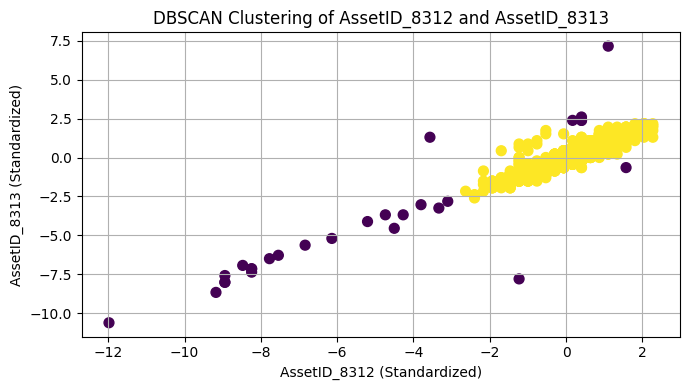

ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ: 3333
ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ: 28

ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):
   AssetID_8312  AssetID_8313 cluster_status
0          32.0          33.0       abnormal
1          36.0          36.0       abnormal
2          73.0          69.0         normal
3          70.0          67.0         normal
4          66.0          63.0         normal
5          70.0          65.5         normal
6          71.0          68.0         normal
7          67.0          64.0         normal
8          72.0          72.0         normal
9          62.0          59.0         normal


In [ ]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ
scaled_df_clean['cluster'] = labels

# ÿ™ÿ®ÿØ€åŸÑ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿ®Ÿá Ÿàÿ∂ÿπ€åÿ™ ŸÜÿ±ŸÖÿßŸÑ/ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
scaled_df_clean['cluster_status'] = scaled_df_clean['cluster'].map(lambda x: 'abnormal' if x == -1 else 'normal')

# ÿ±ÿ≥ŸÖ ŸÜÿ™ÿß€åÿ¨ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title('DBSCAN Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ Ÿà ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
status_counts = scaled_df_clean['cluster_status'].value_counts()
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('normal', 0))
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('abnormal', 0))

# ŸÅÿ±ÿ∂ ÿ®ÿ± ÿß€åŸÜ ÿßÿ≥ÿ™ ⁄©Ÿá df1 ÿ¥ÿßŸÖŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸÇÿ®ŸÑ ÿßÿ≤ ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿßÿ≥ÿ™ Ÿà ÿß€åŸÜÿØ⁄©ÿ≥‚ÄåŸáÿß ŸáŸÖ‚Äåÿ±ÿßÿ≥ÿ™ÿß Ÿáÿ≥ÿ™ŸÜÿØ
df1['cluster_status'] = scaled_df_clean['cluster_status']

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≠ÿØÿßŸÇŸÑ €≤ ŸÖŸàÿ±ÿØ abnormal Ÿà €∏ ŸÖŸàÿ±ÿØ normal
abnormal_samples = df1[df1['cluster_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['cluster_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=8, random_state=24)

# ÿ™ÿ±⁄©€åÿ® Ÿà ŸÜŸÖÿß€åÿ¥ €±€∞ ŸÜŸÖŸàŸÜŸá
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):")
print(final_samples)


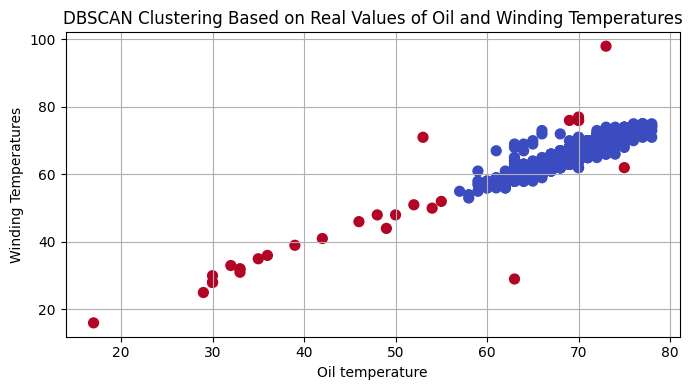

ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ: 3333
ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ: 28

ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):
   AssetID_8312  AssetID_8313 cluster_status
0          32.0          33.0       abnormal
1          36.0          36.0       abnormal
2          73.0          69.0         normal
3          70.0          67.0         normal
4          66.0          63.0         normal
5          70.0          65.5         normal
6          71.0          68.0         normal
7          67.0          64.0         normal
8          72.0          72.0         normal
9          62.0          59.0         normal


In [ ]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
scaled_df_clean['cluster'] = labels
scaled_df_clean['cluster_status'] = scaled_df_clean['cluster'].map(lambda x: 'abnormal' if x == -1 else 'normal')

# ÿßŸÜÿ™ŸÇÿßŸÑ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å (ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å)
df1['cluster_status'] = scaled_df_clean['cluster_status']

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å Ÿà ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸÜÿ±ŸÖÿßŸÑ/ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
plt.figure(figsize=(7, 4))
plt.scatter(
    df1['AssetID_8312'],  # ÿØŸÖÿß€å ÿ±Ÿàÿ∫ŸÜ ÿ™ÿ±ÿßŸÜÿ≥
    df1['AssetID_8313'],  # ÿØŸÖÿß€å ÿ≥€åŸÖ‚ÄåŸæ€å⁄Ü ÿ™ÿ±ÿßŸÜÿ≥
    c=df1['cluster_status'].map({'normal': 0, 'abnormal': 1}),
    cmap='coolwarm',
    s=50
)
plt.title('DBSCAN Clustering Based on Real Values of Oil and Winding Temperatures')
plt.xlabel('Oil temperature')
plt.ylabel('Winding Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ Ÿà ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
status_counts = df1['cluster_status'].value_counts()
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('normal', 0))
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('abnormal', 0))

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≠ÿØÿßŸÇŸÑ €≤ ŸÖŸàÿ±ÿØ abnormal Ÿà €∏ ŸÖŸàÿ±ÿØ normal
abnormal_samples = df1[df1['cluster_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['cluster_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=8, random_state=24)

# ÿ™ÿ±⁄©€åÿ® Ÿà ŸÜŸÖÿß€åÿ¥ €±€∞ ŸÜŸÖŸàŸÜŸá
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):")
print(final_samples)


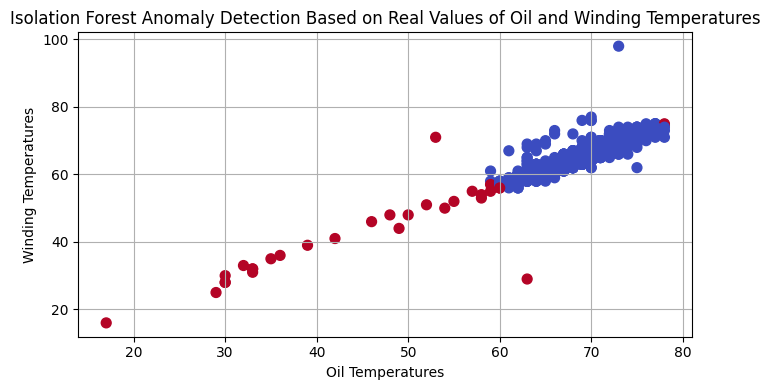

ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ: 3329
ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ: 32

ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):
   AssetID_8312  AssetID_8313 anomaly_status
0          60.0          56.0       abnormal
1          78.0          75.0       abnormal
2          65.0          62.0         normal
3          70.0          66.0         normal
4          71.0          68.5         normal
5          69.0          65.5         normal
6          71.0          70.0         normal
7          65.0          62.0         normal
8          63.0          60.0         normal
9          65.0          61.0         normal


In [ ]:
# ÿßÿ¨ÿ±ÿß€å Isolation Forest ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
iso_forest = IsolationForest(contamination=0.010, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
scaled_df_clean['anomaly_label'] = labels
scaled_df_clean['anomaly_status'] = scaled_df_clean['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# ÿßŸÜÿ™ŸÇÿßŸÑ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å (ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å)
df1['anomaly_status'] = scaled_df_clean['anomaly_status']

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å Ÿà ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸÜÿ±ŸÖÿßŸÑ/ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
plt.figure(figsize=(7, 4))
plt.scatter(
    df1['AssetID_8312'],  # ÿØŸÖÿß€å ÿ±Ÿàÿ∫ŸÜ ÿ™ÿ±ÿßŸÜÿ≥
    df1['AssetID_8313'],  # ÿØŸÖÿß€å ÿ≥€åŸÖ‚ÄåŸæ€å⁄Ü ÿ™ÿ±ÿßŸÜÿ≥
    c=df1['anomaly_status'].map({'normal': 0, 'abnormal': 1}),
    cmap='coolwarm',
    s=50
)
plt.title('Isolation Forest Anomaly Detection Based on Real Values of Oil and Winding Temperatures')
plt.xlabel('Oil Temperatures')
plt.ylabel('Winding Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ Ÿà ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
status_counts = df1['anomaly_status'].value_counts()
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('normal', 0))
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('abnormal', 0))

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≠ÿØÿßŸÇŸÑ €≤ ŸÖŸàÿ±ÿØ abnormal Ÿà €∏ ŸÖŸàÿ±ÿØ normal
abnormal_samples = df1[df1['anomaly_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['anomaly_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=8, random_state=24)

# ÿ™ÿ±⁄©€åÿ® Ÿà ŸÜŸÖÿß€åÿ¥ €±€∞ ŸÜŸÖŸàŸÜŸá
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):")
print(final_samples)
